## Regression  : House Price

### Evaluation : RSMLE

- 과대평가보다 과소평가된 것에 패널티 부여.
- 실제값과 예측값에 오차를 제곱하여 평균한 값의 제곱근, 0에 가까울수록 정밀도가 높음.


# 0. Load Data & Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

import missingno as msno

In [2]:
train = pd.read_csv('house price/train.csv')
test = pd.read_csv('house price/test.csv')

# 1. EDA

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.shape # 1460 rows, 81 columns

(1460, 81)

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

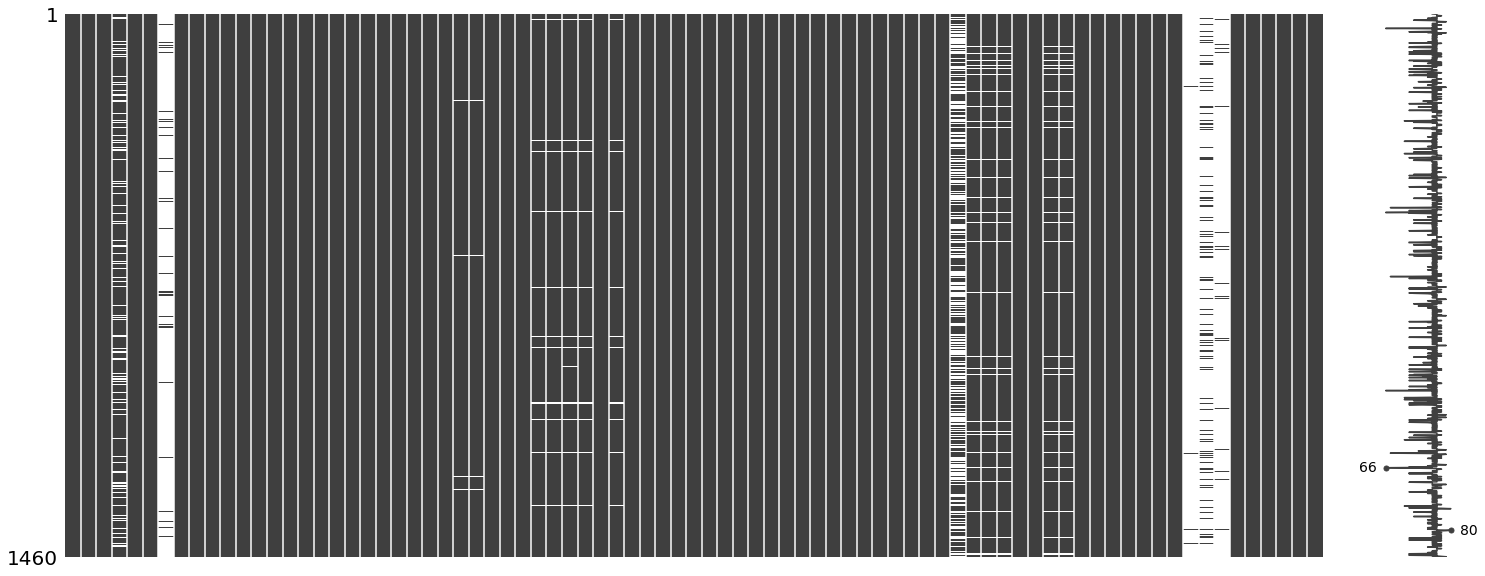

In [8]:
msno.matrix(train)

In [9]:
# 결측치가 500 이상 (3분의 1이 넘는 컬럼) : drop해줄 예정.
train.isnull().sum()[train.isnull().sum()>500]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [10]:
#target : SalesPrice
train.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

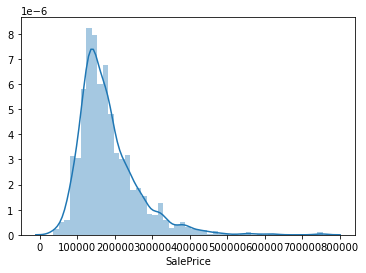

In [11]:
#target분포 
sns.distplot(train['SalePrice']) #왼쪽에서 치우쳐져 있기 때문에 정규 분포가 아님.

In [12]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
train = train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=False)

In [14]:
print(train.shape)
print(test.shape)

(1460, 76)
(1459, 80)


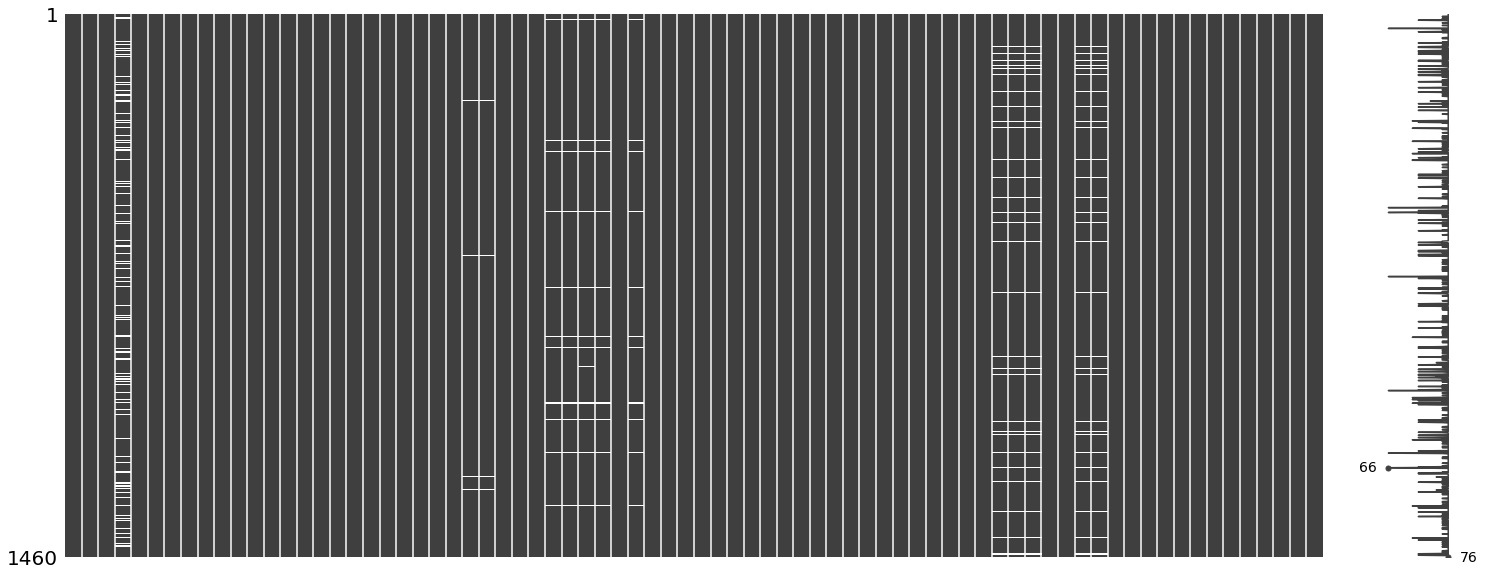

In [15]:
#나머지 결측치 보간
msno.matrix(train)

# 2. Data Cleansing

In [16]:
train = train.interpolate()
test = test.interpolate()

In [17]:
#수치형이 아닌 컬럼? 
train.isnull().sum()[train.isnull().sum()>0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [18]:
train_ohe = pd.get_dummies(train)
test_ohe = pd.get_dummies(test)

In [19]:
train_ohe.isnull().sum()[train_ohe.isnull().sum()>0]

Series([], dtype: int64)

In [20]:
train_ohe.shape #원핫인코딩으로 인해 컬럼수 증가

(1460, 272)

In [21]:
train_ohe.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=272)

# 3. Modeling

In [22]:
#평가지표 rsme 함수 
from sklearn.metrics import mean_squared_error

def rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    return rmse


def get_rmse(models):
    rmses = []
    for model in models:
        rmse_ = rmse(model)
        rmses.append(rmse_)
    return rmses

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

y_target = train_ohe['SalePrice']
x_data = train_ohe.drop(['SalePrice', 'Id'], axis=1, inplace = False)

x_test = test_ohe.drop('Id', axis=1, inplace=False)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.2, random_state=777)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 270) (292, 270) (1168,) (292,)


In [25]:
#linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Lasso 
las = Lasso()
las.fit(X_train, y_train)

#Ridge
rid = Ridge()
rid.fit(X_train, y_train)

models = [lr, las, rid]

In [26]:
get_rmse(models) #ridge가 가장 작음 

[35301797.6635873, 22613.56119640567, 21929.953490738557]

In [ ]:
rid.fit(x_data, y_target)
pred = rid.predict(x_test)

# 4. Submission

In [ ]:
sub = pd.read_csv('house price/sample_submission.csv')
sub['SalePrice'] = pred

In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
pred

# Upgrade : Parameter Tuning, Stacking

In [30]:
# 어떤 피쳐가 각 회귀모델에 어떠한 영향을 미치는지 확인

def get_top_bottom(model, n=10):
    coef = pd.Series(model.coef_, index=x_data.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n) #상위 10개
    coef_low = coef.sort_values(ascending=False).tail(n) #하위 10개
    
    return coef_high, coef_low  

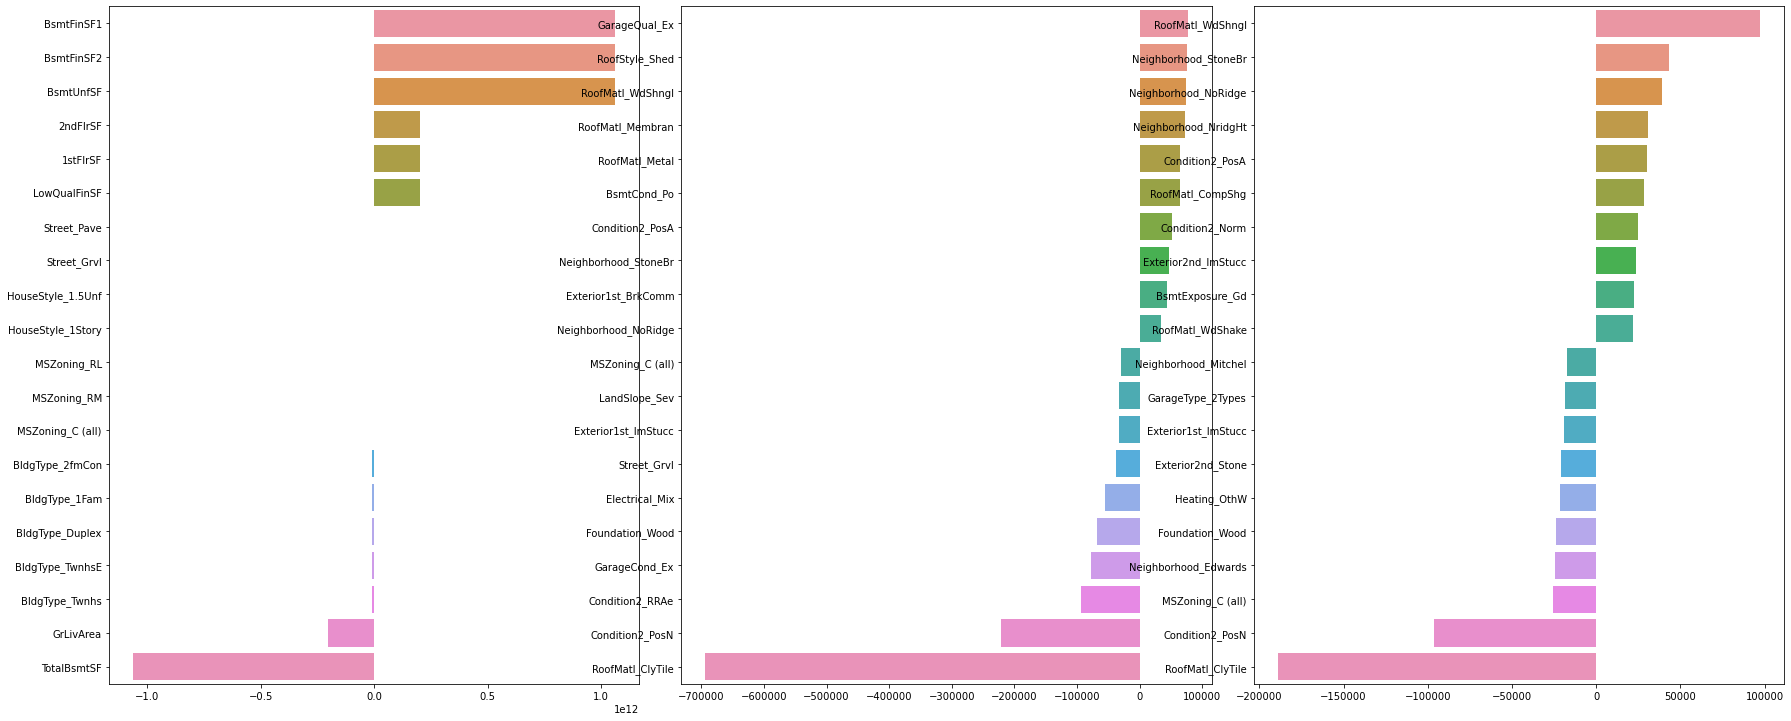

In [31]:
def visualization(models):
    fig,axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i_num])
        
visualization(models)